### Data Overview

In [1]:
import pandas as pd
df = pd.read_csv("/kaggle/input/playground-series-s5e5/train.csv")


In [2]:
def check_df(dataframe,head = 5):
    print("------------------------- Shape -----------------------") #satır ve sütün
    print(dataframe.shape)
    print("------------------------- Types -----------------------") # tipler
    print(dataframe.dtypes)
    print("------------------------- Head ------------------------") # ilk  satır
    print(dataframe.head(head))
    print("------------------------- Tail ------------------------") # son satır 
    print(dataframe.tail(head))
    print("------------------------- NA --------------------------") #eksik deger 
    print(dataframe.isnull().sum())
    numeric_cols = dataframe.select_dtypes(include=['number'])  # yüzdelik (quantile) değerlerini verir
    print(numeric_cols.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)
df.info()

------------------------- Shape -----------------------
(750000, 9)
------------------------- Types -----------------------
id              int64
Sex            object
Age             int64
Height        float64
Weight        float64
Duration      float64
Heart_Rate    float64
Body_Temp     float64
Calories      float64
dtype: object
------------------------- Head ------------------------
   id     Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories
0   0    male   36   189.0    82.0      26.0       101.0       41.0     150.0
1   1  female   64   163.0    60.0       8.0        85.0       39.7      34.0
2   2  female   51   161.0    64.0       7.0        84.0       39.8      29.0
3   3    male   20   192.0    90.0      25.0       105.0       40.7     140.0
4   4  female   38   166.0    61.0      25.0       102.0       40.6     146.0
------------------------- Tail ------------------------
            id     Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
7499

In [3]:
def grab_col_names(dataframe ,cat_th = 10,car_th=20):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optional
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

print(f"cat cols : {cat_cols}")
print(f"num cols : {num_cols}")
print(f"cat but cars : {cat_but_car}")

Observations: 750000
Variables: 9
cat_cols: 1
num_cols: 8
cat_but_car: 0
num_but_cat: 0
cat cols : ['Sex']
num cols : ['id', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']
cat but cars : []


### Categorical Variable Analysis

In [4]:
import seaborn as sns

def cat_summary(dataframe ,col_name , plot = False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(), #kac kez tekrarlandıgını bulur 
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)})) #yüzdelik hesabı 
    print("##########################################")
    if plot:
        sns.countplot(x =dataframe[col_name],data = dataframe)
        plt.show()

for col in cat_cols:
    cat_summary(df,col)

           Sex      Ratio
Sex                      
female  375721  50.096133
male    374279  49.903867
##########################################


### Numerical Variable Analysis

count    750000.000000
mean     374999.500000
std      216506.495284
min           0.000000
5%        37499.950000
10%       74999.900000
20%      149999.800000
30%      224999.700000
40%      299999.600000
50%      374999.500000
60%      449999.400000
70%      524999.300000
80%      599999.200000
90%      674999.100000
95%      712499.050000
99%      742499.010000
max      749999.000000
Name: id, dtype: float64


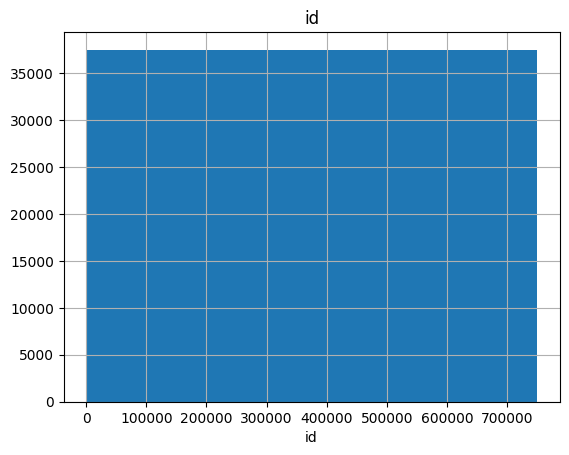

count    750000.000000
mean         41.420404
std          15.175049
min          20.000000
5%           21.000000
10%          22.000000
20%          26.000000
30%          31.000000
40%          35.000000
50%          40.000000
60%          44.000000
70%          50.000000
80%          55.000000
90%          63.000000
95%          70.000000
99%          77.000000
max          79.000000
Name: Age, dtype: float64


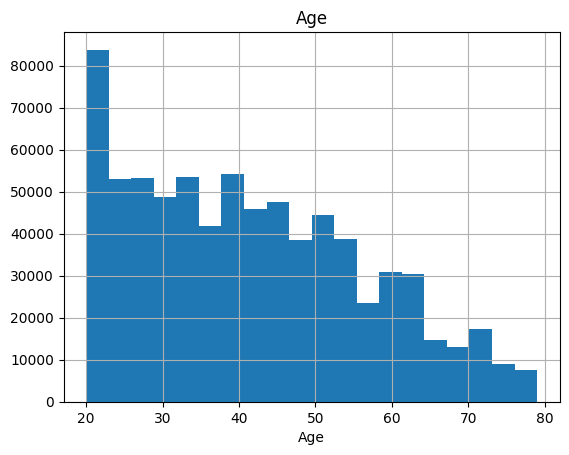

count    750000.000000
mean        174.697685
std          12.824496
min         126.000000
5%          154.000000
10%         158.000000
20%         162.000000
30%         166.000000
40%         170.000000
50%         174.000000
60%         179.000000
70%         183.000000
80%         187.000000
90%         192.000000
95%         195.000000
99%         201.000000
max         222.000000
Name: Height, dtype: float64


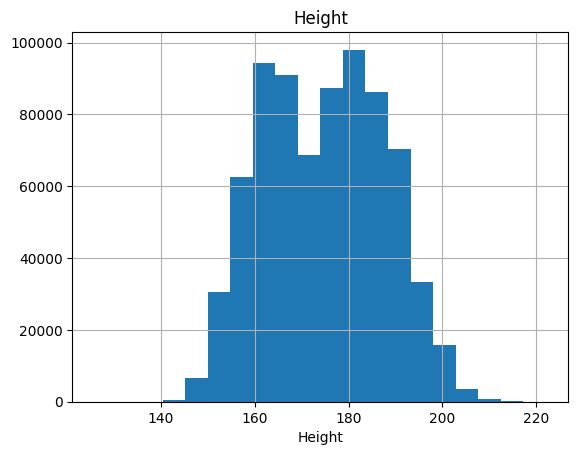

count    750000.000000
mean         75.145668
std          13.982704
min          36.000000
5%           55.000000
10%          58.000000
20%          61.000000
30%          65.000000
40%          69.000000
50%          74.000000
60%          79.000000
70%          84.000000
80%          89.000000
90%          94.000000
95%          99.000000
99%         103.000000
max         132.000000
Name: Weight, dtype: float64


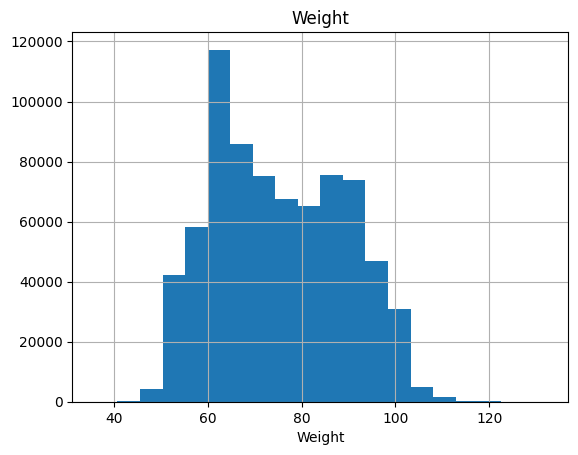

count    750000.000000
mean         15.421015
std           8.354095
min           1.000000
5%            3.000000
10%           4.000000
20%           7.000000
30%          10.000000
40%          12.000000
50%          15.000000
60%          18.000000
70%          21.000000
80%          24.000000
90%          27.000000
95%          28.000000
99%          30.000000
max          30.000000
Name: Duration, dtype: float64


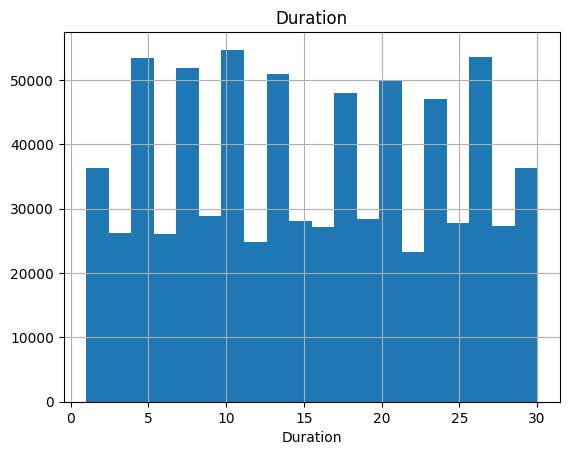

count    750000.000000
mean         95.483995
std           9.449845
min          67.000000
5%           80.000000
10%          83.000000
20%          87.000000
30%          90.000000
40%          92.000000
50%          95.000000
60%          98.000000
70%         101.000000
80%         104.000000
90%         108.000000
95%         111.000000
99%         115.000000
max         128.000000
Name: Heart_Rate, dtype: float64


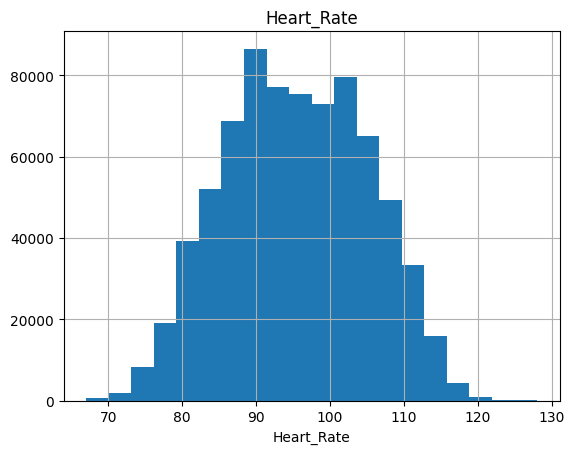

count    750000.000000
mean         40.036253
std           0.779875
min          37.100000
5%           38.500000
10%          38.900000
20%          39.400000
30%          39.800000
40%          40.000000
50%          40.300000
60%          40.400000
70%          40.600000
80%          40.700000
90%          40.800000
95%          40.900000
99%          41.100000
max          41.500000
Name: Body_Temp, dtype: float64


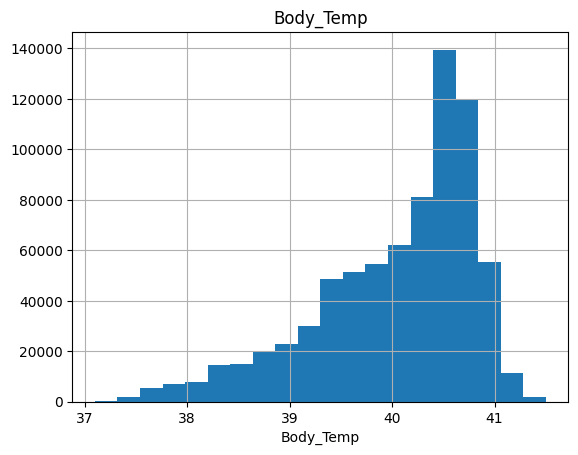

count    750000.000000
mean         88.282781
std          62.395349
min           1.000000
5%            8.000000
10%          14.000000
20%          27.000000
30%          42.000000
40%          58.000000
50%          77.000000
60%          98.000000
70%         121.000000
80%         150.000000
90%         181.000000
95%         200.000000
99%         237.000000
max         314.000000
Name: Calories, dtype: float64


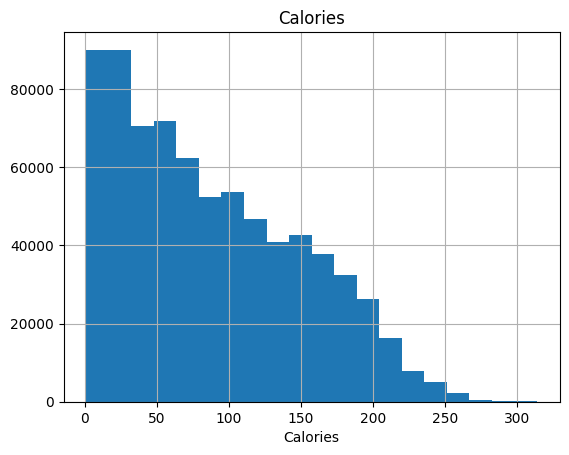

In [5]:
import matplotlib.pyplot as plt
def num_summary (dataframe ,numerical_col , plot = False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()

for col in num_cols:
    num_summary(df,col,plot = True)

### ANALYSIS OF NUMERICAL AND CATEGORICAL VARIABLES BY TARGET

In [6]:
def target_summary_with_num(dataframe,target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}),end = "\n\n\n")

for col in num_cols:
    target_summary_with_num(df, "Calories",col)

                     id
Calories               
1.0       379678.376923
2.0       377430.875360
3.0       378001.730737
4.0       369224.426885
5.0       376105.145450
...                 ...
287.0     368182.800000
289.0     359714.906250
295.0     312551.271605
300.0     361369.031250
314.0     354636.346154

[277 rows x 1 columns]


                Age
Calories           
1.0       25.995385
2.0       30.400247
3.0       35.128211
4.0       39.127814
5.0       36.432343
...             ...
287.0     65.888889
289.0     53.281250
295.0     67.580247
300.0     62.781250
314.0     66.538462

[277 rows x 1 columns]


              Height
Calories            
1.0       180.624615
2.0       180.596051
3.0       178.540000
4.0       176.047537
5.0       179.101367
...              ...
287.0     187.711111
289.0     186.750000
295.0     187.432099
300.0     188.062500
314.0     193.615385

[277 rows x 1 columns]


             Weight
Calories           
1.0       80.681538
2.0       81.0452

In [7]:
import pandas as pd

def target_summary_with_cat(dataframe, target, cat_col):
  
    print(f"### {cat_col} - {target} İstatistikleri ###")
    # Kategorik değişkenin her bir kategorisinin hedef değişkenin dağılımını gösterir
    print(dataframe.groupby(cat_col)[target].describe(), end="\n\n\n")

# Kategorik değişkenlerin hedef değişkenle olan analizini yapma
for col in cat_cols:  # cat_cols, daha önce tanımladığınız kategorik değişkenlerin listesidir
    target_summary_with_cat(df, "Calories", col)

### Sex - Calories İstatistikleri ###
           count       mean        std  min   25%   50%    75%    max
Sex                                                                  
female  375721.0  87.534761  57.905734  1.0  37.0  80.0  133.0  300.0
male    374279.0  89.033683  66.590171  1.0  31.0  73.0  138.0  314.0




### Outlier Analysis

In [8]:
#Amacı: Belirtilen sütunda aykırı değerlerin sınırlarını hesaplamak.
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


    #Amacı: Bir sütunda aykırı değerlerin var olup olmadığını kontrol etmek.
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False


 # Amacı: Aykırı değerleri, belirlenen alt ve üst eşiklerle değiştirmek.
def replace_with_thresholds(dataframe, variable, q1=0.05, q3=0.95):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1=0.05, q3=0.95)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

# Aykırı Değer Analizi ve Baskılama İşlemi
for col in num_cols:
    print(col, check_outlier(df, col))
    if check_outlier(df, col):
        replace_with_thresholds(df, col)

id False
Age False
Height False
Weight False
Duration False
Heart_Rate False
Body_Temp False
Calories False


#### Missing Observation Analysis

In [9]:
import pandas as pd
import numpy as np

# Eksik değer analizi fonksiyonu
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")
    if na_name:
        return na_columns

# Eksik değerleri göster
na_columns = missing_values_table(df, na_name=True)


# Eksik değerleri tekrar kontrol et
df.isnull().sum()

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


id            0
Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

### Correlation

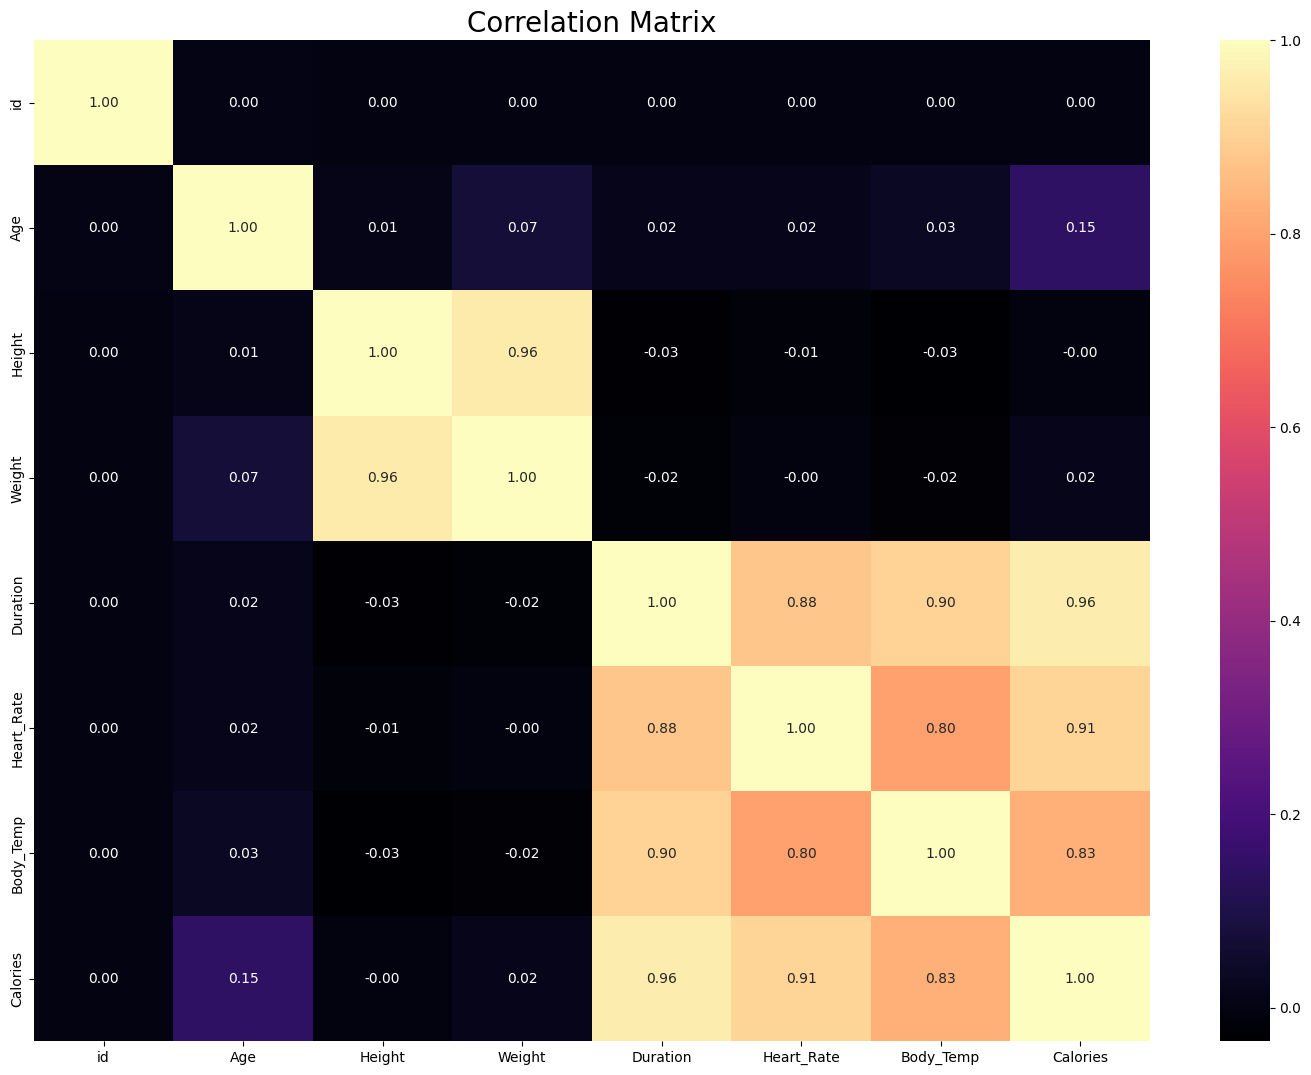

In [10]:
import matplotlib.pyplot as plt

df[num_cols].corr()

f,ax   =plt.subplots(figsize=[18,13])
sns.heatmap(df[num_cols].corr(),annot = True , fmt = ".2f", ax = ax,cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

### FEATURE EXTRACTION

In [11]:
# One Hot Encoding ile 'Sex' sütununu dönüştür
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

df = df.drop('id', axis=1)


In [12]:
df['BMI'] = df['Weight'] / (df['Height'] / 100) ** 2


In [13]:
df['High_Body_Temp'] = df['Body_Temp'] > 38.0


In [14]:
bins = [0, 18, 45, 65, 100]
labels = ['Child', 'Adult', 'Middle_Aged', 'Senior']
df['Age_group'] = pd.cut(df['Age'], bins=bins, labels=labels)
df = pd.get_dummies(df, columns=['Age_group'], drop_first=True)


In [15]:
df.head()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Sex_male,BMI,High_Body_Temp,Age_group_Adult,Age_group_Middle_Aged,Age_group_Senior
0,36,189.0,82.0,26.0,101.0,41.0,150.0,True,22.955684,True,True,False,False
1,64,163.0,60.0,8.0,85.0,39.7,34.0,False,22.582709,True,False,True,False
2,51,161.0,64.0,7.0,84.0,39.8,29.0,False,24.690405,True,False,True,False
3,20,192.0,90.0,25.0,105.0,40.7,140.0,True,24.414062,True,True,False,False
4,38,166.0,61.0,25.0,102.0,40.6,146.0,False,22.136740,True,True,False,False


### Standardization

In [16]:
import pandas as pd

def standardize_columns(dataframe, cols_to_standardize):
    """
    Standartlaştırma işlemi yapar.
    
    Parameters:
    - dataframe: Standartlaştırılacak DataFrame
    - cols_to_standardize: Standartlaştırılacak sütun adları listesi
    
    Returns:
    - DataFrame: Standartlaştırılmış DataFrame
    """
    # Sütunların standartlaştırılması
    for col in cols_to_standardize:
        if col in dataframe.columns:
            mean = dataframe[col].mean()
            std = dataframe[col].std()
            dataframe[col] = (dataframe[col] - mean) / std
        else:
            print(f"{col} sütunu mevcut değil.")
    
    return dataframe

# Örnek kullanım
cols_to_standardize = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories', 'BMI']# Standartlaştırılacak sütunlar
df_standardized = standardize_columns(df.copy(), cols_to_standardize)
print(df_standardized.head())

        Age    Height    Weight  Duration  Heart_Rate  Body_Temp  Calories  \
0 -0.357192  1.115234  0.490201  1.266323    0.583714   1.235772  0.989132   
1  1.487942 -0.912136 -1.083172 -0.888309   -1.109436  -0.431163 -0.869981   
2  0.631273 -1.068088 -0.797104 -1.008010   -1.215257  -0.302937 -0.950115   
3 -1.411554  1.349161  1.062336  1.146621    1.007001   0.851094  0.828863   
4 -0.225397 -0.678209 -1.011655  1.146621    0.689536   0.722869  0.925024   

   Sex_male       BMI  High_Body_Temp  Age_group_Adult  Age_group_Middle_Aged  \
0      True -0.939008            True             True                  False   
1     False -1.185798            True            False                   True   
2     False  0.208818            True            False                   True   
3      True  0.025968            True             True                  False   
4     False -1.480886            True             True                  False   

   Age_group_Senior  
0             False  


# Modeling

In [17]:
import numpy as np

def rmsle(y_true, y_pred):
    # Negatif ve sıfır tahminleri ve gerçek değerleri log almadan önce önlem için epsilon ekleyelim
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    log_true = np.log1p(y_true)
    log_pred = np.log1p(y_pred)
    
    return np.sqrt(np.mean((log_pred - log_true) ** 2))


In [18]:
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

# RMSLE hesaplama fonksiyonu
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

# Veri
X = df.drop(['Calories'], axis=1)
y = df['Calories']

# Boolean sütunları int tipine dönüştür
bool_cols = X.select_dtypes(include='bool').columns
X[bool_cols] = X[bool_cols].astype(int)

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Model oluşturma
model = lgb.LGBMRegressor(
    objective='regression',
    boosting_type='gbdt',
    learning_rate=0.05,
    num_leaves=31,
    n_estimators=1000,
    random_state=42
)

# Modeli erken durdurmayla eğit
model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric='rmse',
    callbacks=[
        lgb.early_stopping(stopping_rounds=50),
        lgb.log_evaluation(period=100)  # Her 100 iterasyonda çıktı verir
    ]
)

# Tahmin yap
y_pred = model.predict(X_val)

# Negatif tahminleri 0 yap
y_pred = np.maximum(0, y_pred)

# RMSLE skorunu hesapla
score = rmsle(y_val, y_pred)
print(f"LightGBM model RMSLE: {score:.5f}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009998 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 623
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 12
[LightGBM] [Info] Start training from score 88.298465
Training until validation scores don't improve for 50 rounds
[100]	valid_0's rmse: 4.04843	valid_0's l2: 16.3898
[200]	valid_0's rmse: 3.7477	valid_0's l2: 14.0453
[300]	valid_0's rmse: 3.68639	valid_0's l2: 13.5895
[400]	valid_0's rmse: 3.65928	valid_0's l2: 13.3903
[500]	valid_0's rmse: 3.63962	valid_0's l2: 13.2468
[600]	valid_0's rmse: 3.62847	valid_0's l2: 13.1658
[700]	valid_0's rmse: 3.61983	valid_0's l2: 13.1032
[800]	valid_0's rmse: 3.61241	valid_0's l2: 13.0495
[900]	valid_0's rmse: 3.6084	valid_0's l2: 13.0205
[1000]	valid_0's rmse: 3.60658	valid_0's l2: 13.0074
Did not meet 

In [24]:
import pandas as pd

# Test verisini oku
test_path = "/kaggle/input/playground-series-s5e5/test.csv"
test_df = pd.read_csv(test_path)

# Feature Engineering - eğitimde kullandığın sütunları testte oluştur
test_df['Sex_male'] = (test_df['Sex'] == 'male').astype(int)

# BMI hesapla
test_df['BMI'] = test_df['Weight'] / (test_df['Height'] / 100) ** 2

# High_Body_Temp sütunu (vücut sıcaklığı 40'ın üstü mü)
test_df['High_Body_Temp'] = (test_df['Body_Temp'] > 40).astype(int)

# Yaş gruplarını oluştur
test_df['Age_group_Adult'] = ((test_df['Age'] >= 18) & (test_df['Age'] < 40)).astype(int)
test_df['Age_group_Middle_Aged'] = ((test_df['Age'] >= 40) & (test_df['Age'] < 60)).astype(int)
test_df['Age_group_Senior'] = (test_df['Age'] >= 60).astype(int)

# Tahmin için kullanılacak sütunlar (eğitim setiyle aynı sıralama ve isimde olmalı)
features = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 
            'Sex_male', 'BMI', 'High_Body_Temp', 'Age_group_Adult', 'Age_group_Middle_Aged', 'Age_group_Senior']

X_test = test_df[features]

# Daha önce eğitilmiş modelin burada tanımlı olduğunu varsayıyorum (model)
test_df['Calories'] = model.predict(X_test)

# Sonuçları id ve Calories ile kaydet
submission = test_df[['id', 'Calories']]
submission.to_csv('submission.csv', index=False)

print(submission.head())


       id    Calories
0  750000   27.125880
1  750001  110.066327
2  750002   86.719685
3  750003  125.520458
4  750004   75.678232
